<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [10]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

C:\Users\Samsung\Anaconda3\envs\unit4-NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
df = pd.read_csv('./Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
print(df.shape)
df.head()

#Start Here

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Gensim LDA topic Modeling

In [8]:
# slight data cleaning and tokenization. 

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [11]:
df['tokens'] = df['reviews.text'].progress_apply(tokenize)

100%|████████████████████████████████████████████████████████████████████████| 28332/28332 [00:00<00:00, 104548.00it/s]


In [12]:
df['tokens'].head()

0    [i, order, 3, of, them, and, one, of, the, ite...
1    [bulk, is, always, the, less, expensive, way, ...
2    [well, they, are, not, duracell, but, for, the...
3    [seem, to, work, as, well, as, name, brand, ba...
4    [these, batteries, are, very, long, lasting, t...
Name: tokens, dtype: object

In [13]:
# A Dictionary Representation of all the words in our corpus

id2word = corpora.Dictionary(df['tokens'])

In [29]:
items = [(keys, values) for keys, values in id2word.items()]

items[:10]

[(0, '3'),
 (1, 'a'),
 (2, 'aluminum'),
 (3, 'and'),
 (4, 'backup'),
 (5, 'bad'),
 (6, 'battery'),
 (7, 'have'),
 (8, 'i'),
 (9, 'is')]

In [32]:
# document to bag of words

bagofwords = id2word.doc2bow(df['reviews.text'])

bagofwords[:10]

[(24, 1),
 (31, 1),
 (41, 1),
 (46, 1),
 (52, 49),
 (69, 60),
 (85, 1),
 (95, 5),
 (165, 1),
 (174, 3)]

In [42]:
id2word.doc2bow(df['reviews.text'])[:10]

[(21, 1),
 (28, 1),
 (38, 1),
 (43, 1),
 (49, 49),
 (66, 60),
 (82, 1),
 (90, 5),
 (156, 1),
 (164, 3)]

In [43]:
len(id2word.keys())

2174

In [34]:
# removing extreme values

filtered = id2word.filter_extremes(no_below = 15, no_above=0.90)

In [37]:
id2word.filter_extremes(no_below = 15, no_above=0.90)

In [38]:
len(id2word.keys())

2174

In [48]:
# a bag of words(bow) representation of our corpus
corpus = [id2word.doc2bow(text) for text in df['tokens']]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 2),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 3),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1),
 (20, 2),
 (21, 1)]

In [50]:
# LDA documentation 
# https://radimrehurek.com/gensim/models/ldamulticore.html

lda = LdaMulticore(corpus=corpus,
                  id2word = id2word,
                  random_state = 42,
                  num_topics=5,
                  passes=10)

In [51]:
lda.print_topics()

[(0,
  '0.043*"the" + 0.042*"i" + 0.042*"it" + 0.031*"to" + 0.029*"and" + 0.029*"a" + 0.024*"for" + 0.023*"is" + 0.019*"this" + 0.018*"my"'),
 (1,
  '0.049*"for" + 0.044*"and" + 0.038*"it" + 0.033*"to" + 0.031*"my" + 0.028*"the" + 0.026*"this" + 0.024*"tablet" + 0.021*"a" + 0.021*"is"'),
 (2,
  '0.065*"the" + 0.032*"as" + 0.025*"a" + 0.025*"and" + 0.023*"to" + 0.023*"great" + 0.020*"is" + 0.017*"you" + 0.016*"for" + 0.015*"amazon"'),
 (3,
  '0.057*"the" + 0.045*"i" + 0.030*"to" + 0.028*"and" + 0.024*"a" + 0.018*"of" + 0.017*"in" + 0.015*"have" + 0.012*"is" + 0.012*"it"'),
 (4,
  '0.047*"batteries" + 0.029*"they" + 0.027*"great" + 0.027*"and" + 0.026*"a" + 0.026*"good" + 0.024*"these" + 0.024*"the" + 0.024*"i" + 0.024*"as"')]

In [52]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
the i it to and

------ Topic 1 ------
for and it to my

------ Topic 2 ------
the as a and to

------ Topic 3 ------
the i to and a

------ Topic 4 ------
batteries they great and a



## Creat Visual Interpretation for LDA topics

In [54]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [55]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.079159 -0.030797       1        1  25.933426
1     -0.141143  0.044329       2        1  23.499601
3      0.031417 -0.089684       3        1  20.718222
4      0.152296  0.033275       4        1  18.817520
2      0.036588  0.042876       5        1  11.031231, topic_info=           Term          Freq         Total Category  logprob  loglift
43    batteries   7908.000000   7908.000000  Default  30.0000  30.0000
41           as   7625.000000   7625.000000  Default  29.0000  29.0000
18          the  28953.000000  28953.000000  Default  28.0000  28.0000
154          it  16541.000000  16541.000000  Default  27.0000  27.0000
49        great   9354.000000   9354.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1826     tablet    579.574341   6526.722656   Topic5  -4.8938  -0.2169
33          are    526.779724   4624.080566   Topic5  -4.9893   0.0322
34          but    523.282715   4908.772949   Topic5  -4.9960  -0.0342
73           on    518.531433   5616.280762   Topic5  -5.0051  -0.1780
78           in    497.990692   5872.226562   Topic5  -5.0455  -0.2630

[439 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1433      3  0.972319  2015
1174      1  0.035067  2016
1174      3  0.946814  2016
1174      5  0.035067  2016
1550      1  0.043653  2017
...     ...       ...   ...
96        4  0.156337   you
96        5  0.300076   you
1551      1  0.054893    yr
1551      2  0.933185    yr
1551      5  0.009149    yr

[1259 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 5, 3])

In [56]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [57]:
# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=5)

In [58]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [59]:
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-1.308326
1,0,4,-1.386269
2,0,6,-1.381284
3,0,8,-1.413386
4,0,10,-1.442237


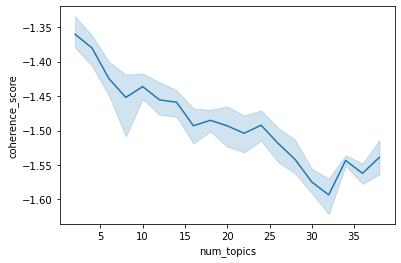

In [60]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [61]:
x = topic_coherence["num_topics"]
y = topic_coherence["coherence_score"]

In [62]:
# Print the coherence scores
for m, cv in zip(x, y):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -1.3083
Num Topics = 4  has Coherence Value of -1.3863
Num Topics = 6  has Coherence Value of -1.3813
Num Topics = 8  has Coherence Value of -1.4134
Num Topics = 10  has Coherence Value of -1.4422
Num Topics = 12  has Coherence Value of -1.4387
Num Topics = 14  has Coherence Value of -1.4671
Num Topics = 16  has Coherence Value of -1.462
Num Topics = 18  has Coherence Value of -1.4975
Num Topics = 20  has Coherence Value of -1.4419
Num Topics = 22  has Coherence Value of -1.4907
Num Topics = 24  has Coherence Value of -1.4902
Num Topics = 26  has Coherence Value of -1.5692
Num Topics = 28  has Coherence Value of -1.5599
Num Topics = 30  has Coherence Value of -1.5797
Num Topics = 32  has Coherence Value of -1.5819
Num Topics = 34  has Coherence Value of -1.5402
Num Topics = 36  has Coherence Value of -1.5495
Num Topics = 38  has Coherence Value of -1.5277
Num Topics = 2  has Coherence Value of -1.3644
Num Topics = 4  has Coherence Value of -1.4273

In [65]:
lda[id2word.doc2bow(df['reviews.text'])]

[(4, 0.9961428)]

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling